In [210]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/time-series-datasets/Electric_Production.csv
/kaggle/input/time-series-datasets/monthly-beer-production-in-austr.csv
/kaggle/input/time-series-datasets/daily-minimum-temperatures-in-me.csv
/kaggle/input/time-series-datasets/sales-of-shampoo-over-a-three-ye.csv


In [211]:
train=pd.read_csv("/kaggle/input/time-series-datasets/Electric_Production.csv")

In [212]:
train.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [213]:
train1=train["IPG2211A2N"]

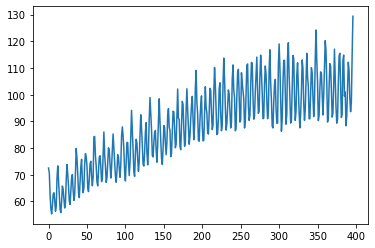

In [214]:
plt.plot(train1)

In [215]:
train1=train1.values.reshape(-1,1)

In [216]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler(feature_range=(0,1))
scale=scale.fit(train1)


In [217]:
scale.data_min_

array([55.3151])

In [218]:
normalize=scale.transform(train1)

In [219]:
normalize[:5]

array([[0.23201741],
       [0.20727443],
       [0.09630353],
       [0.02910391],
       [0.        ]])

In [220]:
res=normalize.flatten()

In [221]:
res[:5]

array([0.23201741, 0.20727443, 0.09630353, 0.02910391, 0.        ])

In [222]:
tt={}

ww=[]
uu=[]
def make(a,b):
        m=0
        k=0
        while k<394:
            qq=[]
            for i in range(b):
                        u=a[m]
                        m=m+1
                        qq.append(u)
            ww.append(qq)  
            uu.append(a[m])
   
            m=k+1
            k=k+1

   
        

In [223]:
make(res,3)

In [224]:
ww[:5]

[[0.2320174059282195, 0.20727442545994923, 0.0963035347693405],
 [0.20727442545994923, 0.0963035347693405, 0.029103910530073773],
 [0.0963035347693405, 0.029103910530073773, 0.0],
 [0.029103910530073773, 0.0, 0.03745864809818378],
 [0.0, 0.03745864809818378, 0.0985980507411961]]

In [225]:
from numpy import array

In [226]:
www=array(ww)

In [227]:
www[:5]

array([[0.23201741, 0.20727443, 0.09630353],
       [0.20727443, 0.09630353, 0.02910391],
       [0.09630353, 0.02910391, 0.        ],
       [0.02910391, 0.        , 0.03745865],
       [0.        , 0.03745865, 0.09859805]])

In [228]:
uu=array(uu)

In [229]:
xtrain,ytrain=www[:325],uu[:325]

In [230]:
xtest,ytest=www[325:],uu[325:]

In [231]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [232]:
model=Sequential()
model.add(LSTM(50,activation="relu",input_shape=(394,1)))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [233]:
xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1], 1)
xtest = xtest.reshape(xtest.shape[0], xtest.shape[1], 1)

In [ ]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=600,verbose=0)

In [ ]:
y_pred=model.predict(xtest)

In [ ]:
y_pred[:5]

In [ ]:
ypred=scale.inverse_transform(y_pred)

In [ ]:
ytest=ytest.reshape(-1,1)

In [ ]:
ytest=scale.inverse_transform(ytest)

In [ ]:
ypred[:5]

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(ytest,ypred))